# PLD - Análise Exploratória

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path = "Historico_do_Preco_Horario_-_17_de_abril_de_2018_a_5_de_abril_de_2024.xlsx"
df = pd.read_excel(path)
df

,Hora,Submercado,2018-04-17 00:00:00,2018-04-18 00:00:00,2018-04-19 00:00:00,2018-04-20 00:00:00,2018-04-21 00:00:00,2018-04-25 00:00:00,2018-04-26 00:00:00,2018-04-27 00:00:00,...,2024-03-27 00:00:00,2024-03-28 00:00:00,2024-03-29 00:00:00,2024-03-30 00:00:00,2024-03-31 00:00:00,2024-04-01 00:00:00,2024-04-02 00:00:00,2024-04-03 00:00:00,2024-04-04 00:00:00,2024-04-05 00:00:00
0,0,SUDESTE,40.16,40.16,40.16,112.06,40.16,40.16,130.12,129.33,...,61.07,61.07,61.07,61.07,61.07,61.07,61.07,61.07,61.07,61.07
1,0,SUL,40.16,40.16,40.16,112.10,40.16,40.16,130.16,129.37,...,61.07,61.07,61.07,61.07,61.07,61.07,61.07,61.07,61.07,61.07
2,0,NORDESTE,40.16,40.16,40.16,111.69,40.16,40.16,130.01,129.23,...,61.07,61.07,61.07,61.07,61.07,61.07,61.07,61.07,61.07,61.07
3,0,NORTE,40.16,40.16,40.16,111.65,40.16,40.16,129.97,129.19,...,61.07,61.07,61.07,61.07,61.07,61.07,61.07,61.07,61.07,61.07
4,1,SUDESTE,40.16,40.16,40.16,112.04,40.16,40.16,130.10,129.31,...,61.07,61.07,61.07,61.07,61.07,61.07,61.07,61.07,61.07,61.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,23,NORTE,114.24,114.84,116.42,117.64,40.16,136.66,136.84,132.57,...,61.07,61.07,61.07,61.07,61.07,61.07,61.07,61.07,61.07,61.07
96,23,SUDESTE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97,23,SUL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98,23,NORDESTE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
colunas_normais = df.iloc[:, :2].columns
colunas_normais

Index(['Hora', 'Submercado'], dtype='object')

In [4]:
colunas_data = df.iloc[:, 2:].columns
colunas_data

Index([2018-04-17 00:00:00, 2018-04-18 00:00:00, 2018-04-19 00:00:00,
       2018-04-20 00:00:00, 2018-04-21 00:00:00, 2018-04-25 00:00:00,
       2018-04-26 00:00:00, 2018-04-27 00:00:00, 2018-04-28 00:00:00,
       2018-04-29 00:00:00,
       ...
       2024-03-27 00:00:00, 2024-03-28 00:00:00, 2024-03-29 00:00:00,
       2024-03-30 00:00:00, 2024-03-31 00:00:00, 2024-04-01 00:00:00,
       2024-04-02 00:00:00, 2024-04-03 00:00:00, 2024-04-04 00:00:00,
       2024-04-05 00:00:00],
      dtype='object', length=2169)

In [5]:
df = df.melt(id_vars=colunas_normais,value_vars=colunas_data, var_name='Data', value_name='Preco')
df

,Hora,Submercado,Data,Preco
0,0,SUDESTE,2018-04-17 00:00:00,40.16
1,0,SUL,2018-04-17 00:00:00,40.16
2,0,NORDESTE,2018-04-17 00:00:00,40.16
3,0,NORTE,2018-04-17 00:00:00,40.16
4,1,SUDESTE,2018-04-17 00:00:00,40.16
...,...,...,...,...
216895,23,NORTE,2024-04-05 00:00:00,61.07
216896,23,SUDESTE,2024-04-05 00:00:00,NaN
216897,23,SUL,2024-04-05 00:00:00,NaN
216898,23,NORDESTE,2024-04-05 00:00:00,NaN


In [6]:
df.Preco.describe()

count    208224.000000
mean        174.994029
std         163.030014
min          39.680000
25%          61.070000
50%          79.190000
75%         254.260000
max        1128.720000
Name: Preco, dtype: float64

In [7]:
df.dtypes

Hora            int64
Submercado     object
Data           object
Preco         float64
dtype: object

### Tratamento da Coluna Hora

Primeiramente, é necessário deixar os valores da coluna hora no formato hh:mm:ss

In [8]:
df.Hora = pd.to_timedelta(df.Hora, unit='h') # Converte no formato timedelta
df.Hora = df.Hora.astype(str)
df.Hora

0         0 days 00:00:00
1         0 days 00:00:00
2         0 days 00:00:00
3         0 days 00:00:00
4         0 days 01:00:00
               ...       
216895    0 days 23:00:00
216896    0 days 23:00:00
216897    0 days 23:00:00
216898    0 days 23:00:00
216899    0 days 23:00:00
Name: Hora, Length: 216900, dtype: object

Em seguida, a parte "0 days" foi removida das linhas

In [9]:
df.Hora = df.Hora.apply(lambda row: row[7:])
df.Hora

0         00:00:00
1         00:00:00
2         00:00:00
3         00:00:00
4         01:00:00
            ...   
216895    23:00:00
216896    23:00:00
216897    23:00:00
216898    23:00:00
216899    23:00:00
Name: Hora, Length: 216900, dtype: object

In [10]:
df.Data = df.Data.apply(lambda row: str(row)[:10])
df.Data

0         2018-04-17
1         2018-04-17
2         2018-04-17
3         2018-04-17
4         2018-04-17
             ...    
216895    2024-04-05
216896    2024-04-05
216897    2024-04-05
216898    2024-04-05
216899    2024-04-05
Name: Data, Length: 216900, dtype: object

Unindo data com hora e deixando o datetime como index. Desse modo, algumas manipulações serão mais fáceis

In [11]:
df.index = pd.to_datetime(df.Data + " " + df.Hora)
df

,Hora,Submercado,Data,Preco
2018-04-17 00:00:00,00:00:00,SUDESTE,2018-04-17,40.16
2018-04-17 00:00:00,00:00:00,SUL,2018-04-17,40.16
2018-04-17 00:00:00,00:00:00,NORDESTE,2018-04-17,40.16
2018-04-17 00:00:00,00:00:00,NORTE,2018-04-17,40.16
2018-04-17 01:00:00,01:00:00,SUDESTE,2018-04-17,40.16
...,...,...,...,...
2024-04-05 23:00:00,23:00:00,NORTE,2024-04-05,61.07
2024-04-05 23:00:00,23:00:00,SUDESTE,2024-04-05,NaN
2024-04-05 23:00:00,23:00:00,SUL,2024-04-05,NaN
2024-04-05 23:00:00,23:00:00,NORDESTE,2024-04-05,NaN


### Análise Exploratória - Nordeste

Text(0, 0.5, 'PLD (R$/MWh)')

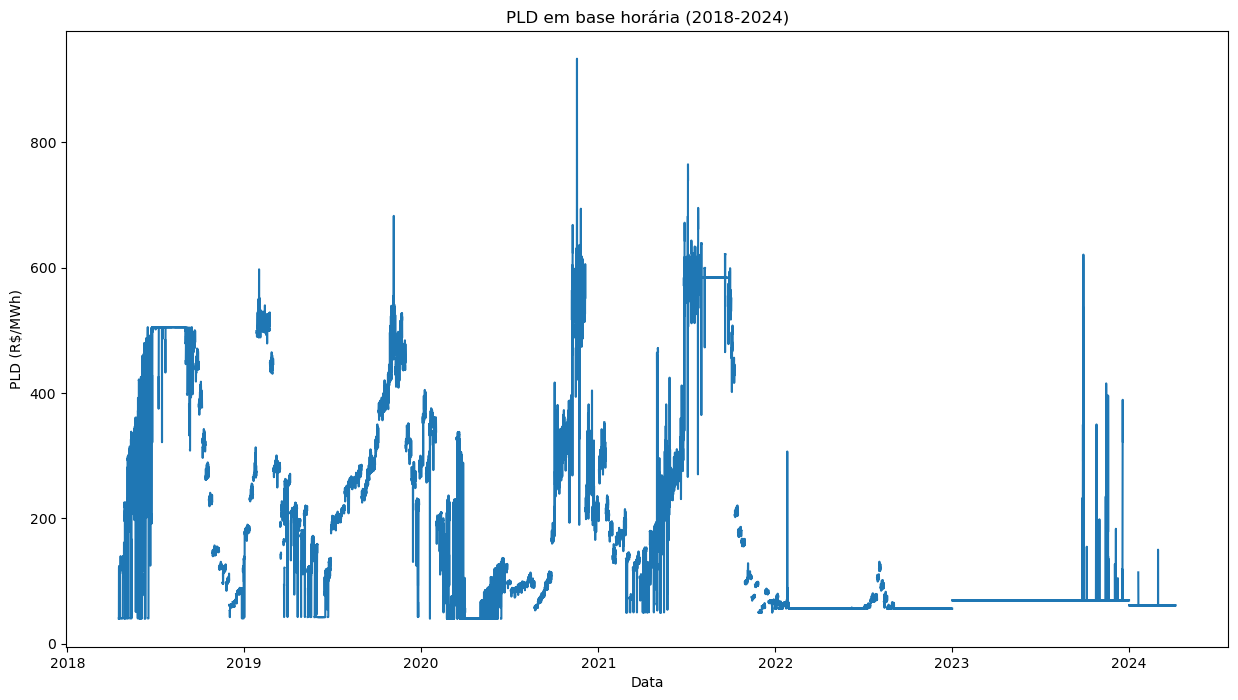

In [15]:
df_ne = df.loc[df.Submercado == "SUL"]
plt.figure(figsize=(15,8))
plt.plot(df_ne.index, df_ne.Preco)
plt.title("PLD em base horária (2018-2024)")
plt.xlabel("Data")
plt.ylabel("PLD (R$/MWh)")

In [70]:
df_ne.describe()

,Preco
count,52056.000000
mean,167.153355
std,160.093651
min,39.680000
25%,58.617500
50%,71.010000
75%,230.547500
max,1128.720000


Text(0, 0.5, 'PLD (R$/MWh)')

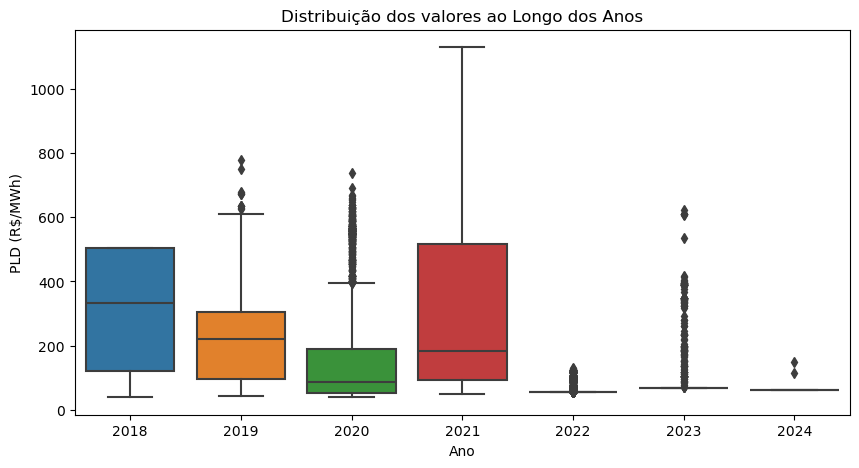

In [82]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df_ne, x=df_ne.index.year,y="Preco")
plt.title("Distribuição dos valores ao Longo dos Anos")
plt.xlabel("Ano")
plt.ylabel("PLD (R$/MWh)")

Text(0, 0.5, 'PLD (R$/MWh)')

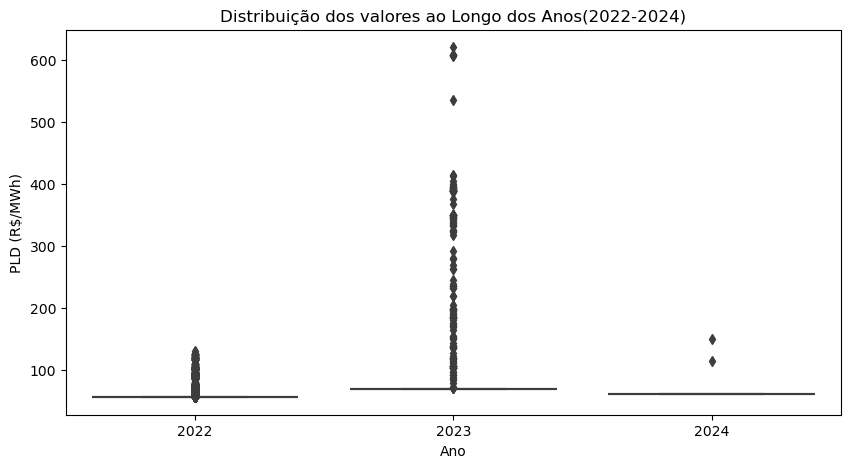

In [86]:
df_ne_lim = df_ne.loc[df_ne.index.year >= 2022]
plt.figure(figsize=(10,5))
sns.boxplot(data=df_ne_lim, x=df_ne_lim.index.year,y="Preco")
plt.title("Distribuição dos valores ao Longo dos Anos(2022-2024)")
plt.xlabel("Ano")
plt.ylabel("PLD (R$/MWh)")

Text(0, 0.5, 'PLD (R$/MWh)')

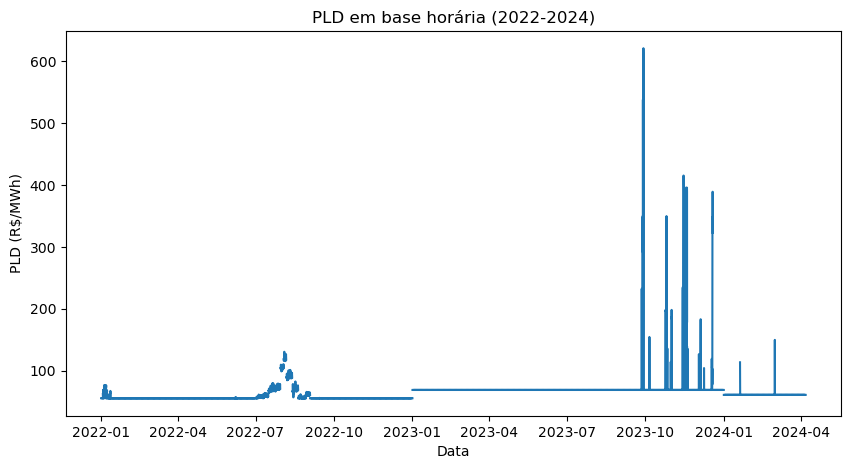

In [87]:
plt.figure(figsize=(10,5))
plt.plot(df_ne_lim.index, df_ne_lim.Preco)
plt.title("PLD em base horária (2022-2024)")
plt.xlabel("Data")
plt.ylabel("PLD (R$/MWh)")